# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key,geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'91b83f133795f0e284366e6896b4a527'

In [3]:
geoapify_key

'7c06e2d627b24c7f96f5b6a8fd455739'

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}&appid={weather_api_key}&units={units}&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + city
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?&appid=91b83f133795f0e284366e6896b4a527&units=metric&q=necochea
Processing Record 1 of Set 1 | necochea
http://api.openweathermap.org/data/2.5/weather?&appid=91b83f133795f0e284366e6896b4a527&units=metric&q=umzimvubu
Processing Record 2 of Set 1 | umzimvubu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=91b83f133795f0e284366e6896b4a527&units=metric&q=bredasdorp
Processing Record 3 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?&appid=91b83f133795f0e284366e6896b4a527&units=metric&q=atuona
Processing Record 4 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?&appid=91b83f133795f0e284366e6896b4a527&units=metric&q=rikitea
Processing Record 5 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?&appid=91b83f133795f0e284366e6896b4a527&units=metric&q=taolanaro
Processing Record 6 of Set 1 | taolanaro
City

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,necochea,-38.5473,-58.7368,12.51,59,71,9.76,AR,1681348763
1,bredasdorp,-34.5322,20.0403,12.84,79,100,2.51,ZA,1681348280
2,atuona,-9.8000,-139.0333,27.03,68,100,3.58,PF,1681348284
3,rikitea,-23.1203,-134.9692,25.28,68,48,4.87,PF,1681348764
4,tuktoyaktuk,69.4541,-133.0374,-19.62,85,44,4.76,CA,1681348321


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,necochea,-38.5473,-58.7368,12.51,59,71,9.76,AR,1681348763
1,bredasdorp,-34.5322,20.0403,12.84,79,100,2.51,ZA,1681348280
2,atuona,-9.8000,-139.0333,27.03,68,100,3.58,PF,1681348284
3,rikitea,-23.1203,-134.9692,25.28,68,48,4.87,PF,1681348764
4,tuktoyaktuk,69.4541,-133.0374,-19.62,85,44,4.76,CA,1681348321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

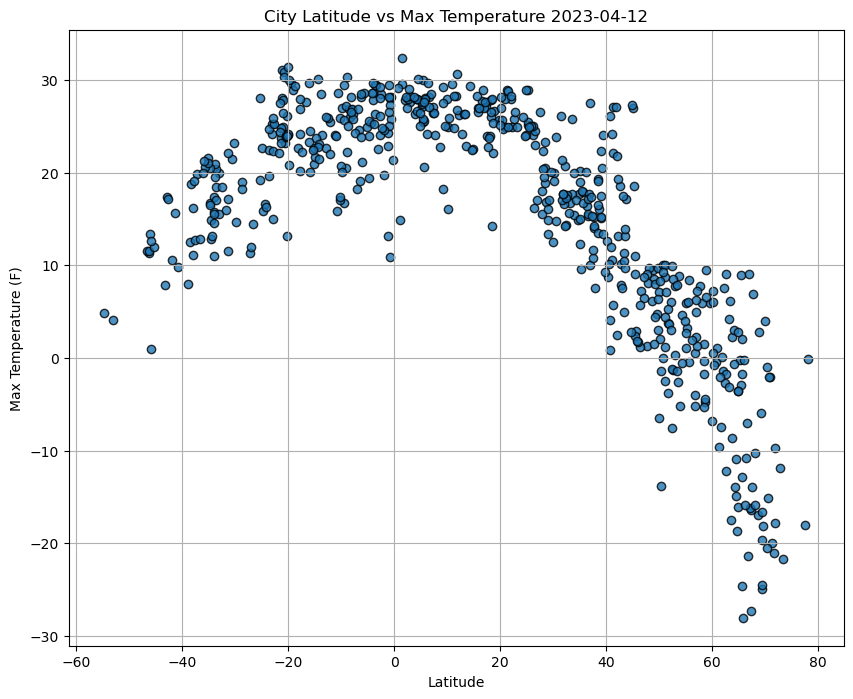

In [10]:
# Build scatter plot for latitude vs. temperature
lat_plot = city_data_df["Lat"]
temp_plot = city_data_df["Max Temp"]
date_now = datetime.date(datetime.now())

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(lat_plot, temp_plot, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature {date_now}")
plt.grid()

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

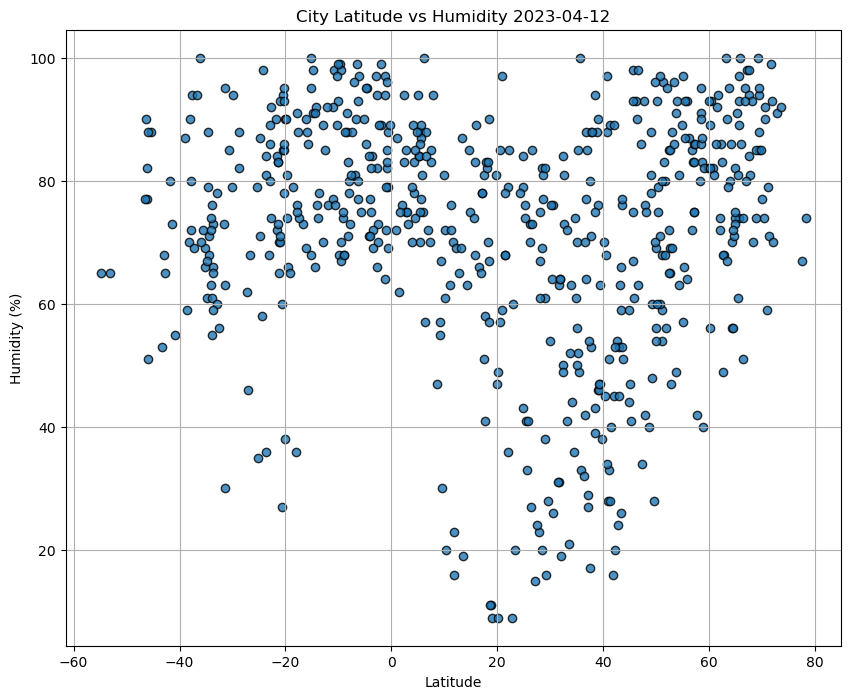

In [11]:
# Build the scatter plots for latitude vs. humidity
lat_plot = city_data_df["Lat"]
humi_plot = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(lat_plot, humi_plot, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date_now}")
plt.grid()

# # Save the figure
plt.savefig("output_data/Fig2.png")

# # Show plot
plt.show()

#### Latitude Vs. Cloudiness

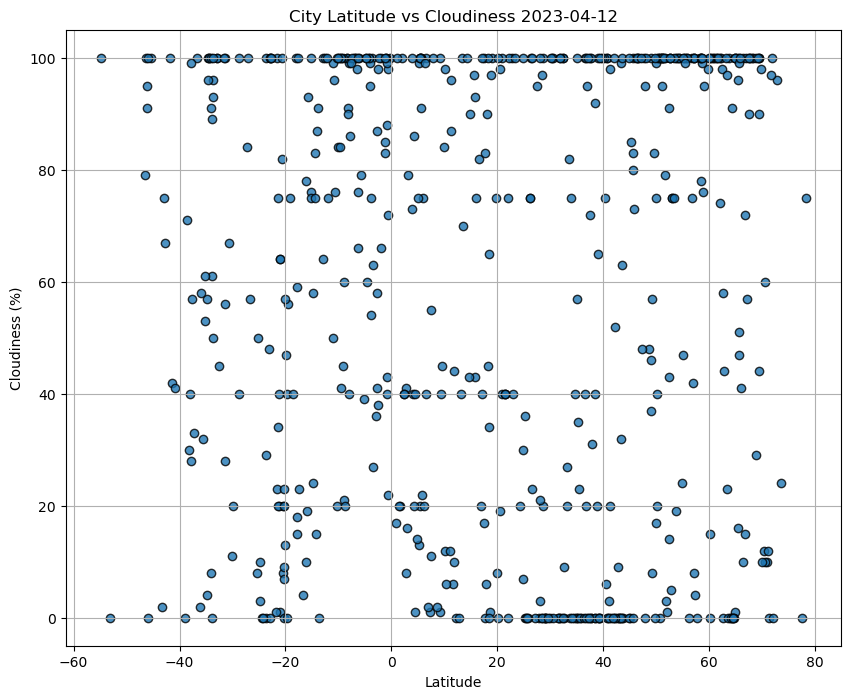

In [12]:
# Build the scatter plots for latitude vs. cloudiness
lat_plot = city_data_df["Lat"]
cloud_plot = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(lat_plot, cloud_plot, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date_now}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

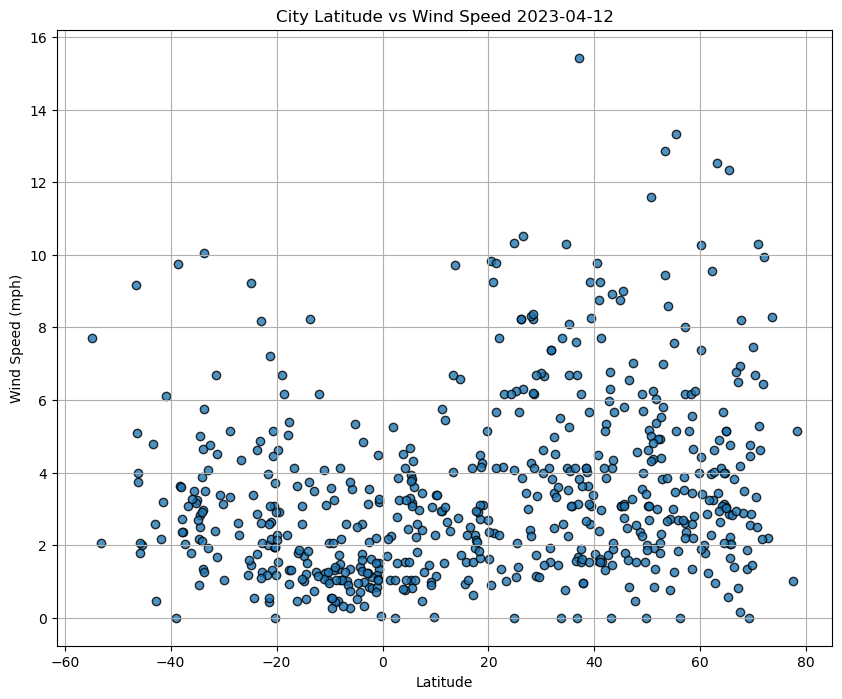

In [13]:
# Build the scatter plots for latitude vs. wind speed
lat_plot = city_data_df["Lat"]
winspeed_plot = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(lat_plot, winspeed_plot, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed {date_now}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, r, p, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    print(f"The r-squared is: {r**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tuktoyaktuk,69.4541,-133.0374,-19.62,85,44,4.76,CA,1681348321
5,umm kaddadah,13.6017,26.6876,22.91,19,70,9.71,SD,1681348764
7,port blair,11.6667,92.7500,28.25,70,6,1.52,IN,1681348764
8,roald,62.5833,6.1333,9.07,49,58,4.63,NO,1681348764
10,avera,33.1940,-82.5271,16.73,41,27,1.46,US,1681348765


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,necochea,-38.5473,-58.7368,12.51,59,71,9.76,AR,1681348763
1,bredasdorp,-34.5322,20.0403,12.84,79,100,2.51,ZA,1681348280
2,atuona,-9.8000,-139.0333,27.03,68,100,3.58,PF,1681348284
3,rikitea,-23.1203,-134.9692,25.28,68,48,4.87,PF,1681348764
6,mataura,-46.1927,168.8643,11.38,77,95,3.74,NZ,1681348764


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7779467867434182
The correlation between both factors is -0.88


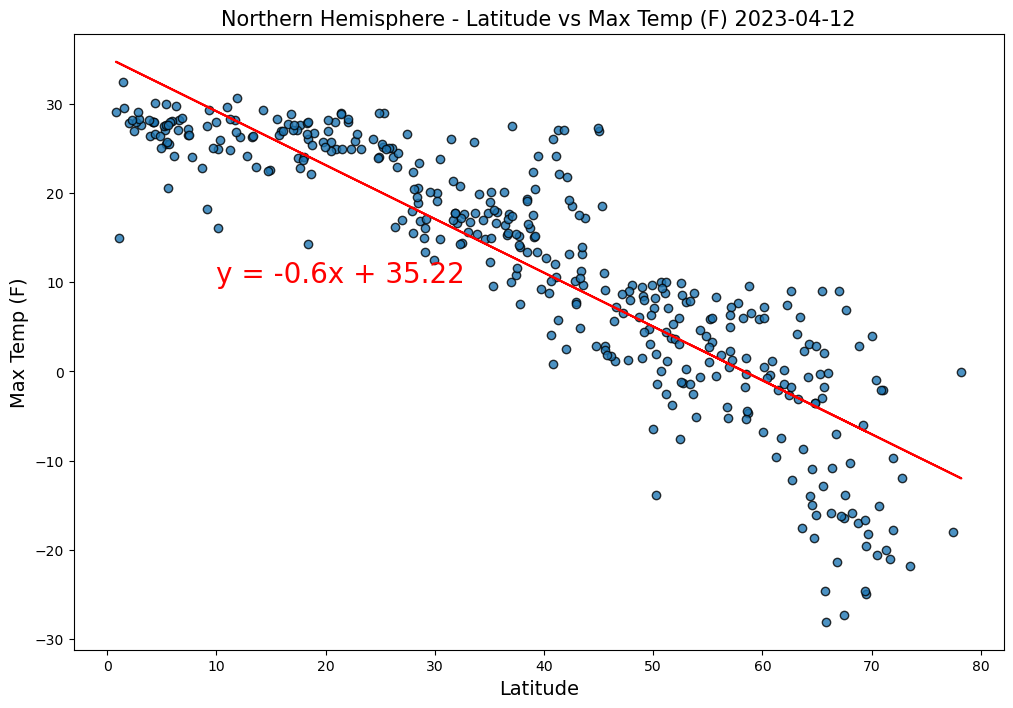

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.4723986108996459
The correlation between both factors is 0.69


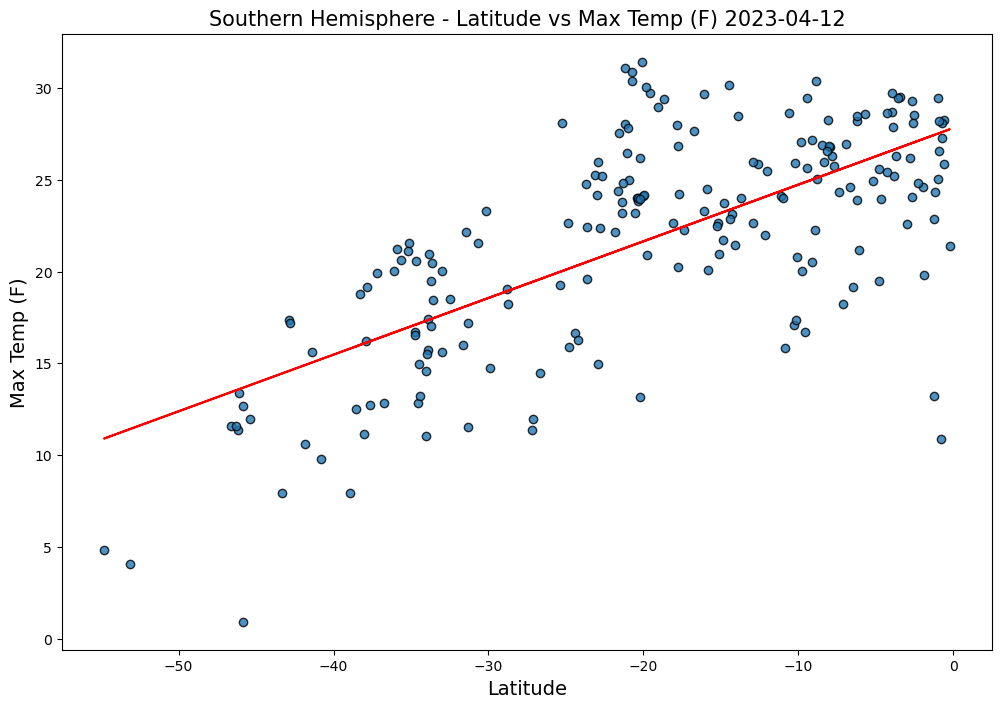

In [39]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

plt.savefig("./output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** In southern hemisphere, there is perfect positive correlation and in the northern hemisphere, there's a negative correlation, both northern and southern hemisphere has strong correlation between latitude and max temperature. The data shows that the more close to the equator, the maximum temperature keeps rasing in a more linear manner.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04477753398772416
The correlation between both factors is 0.21


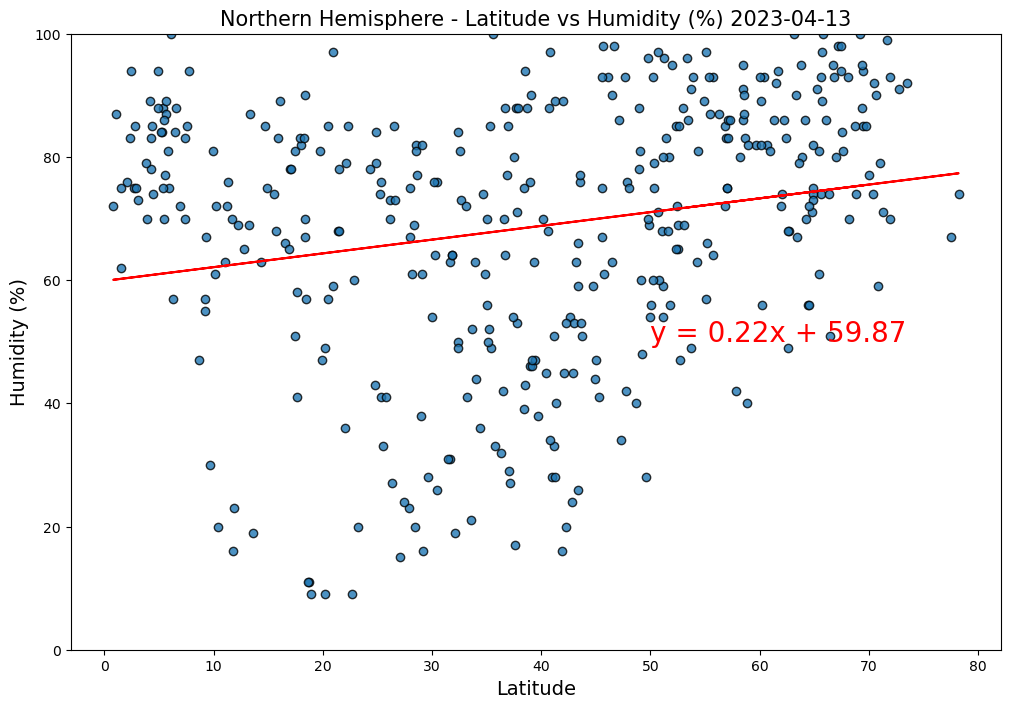

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50, 50), 100)
plt.savefig("./output_data/northern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.0957568079858192
The correlation between both factors is 0.31


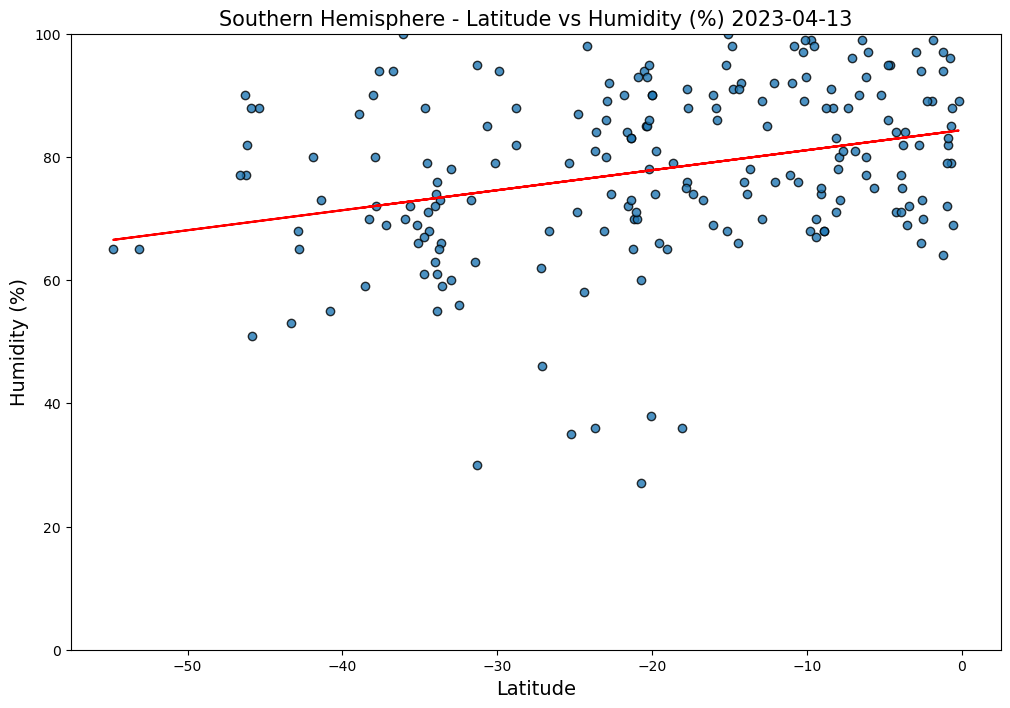

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there's no relationship between latitude and humidity. Same for the sorthern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0211086147005382
The correlation between both factors is 0.15


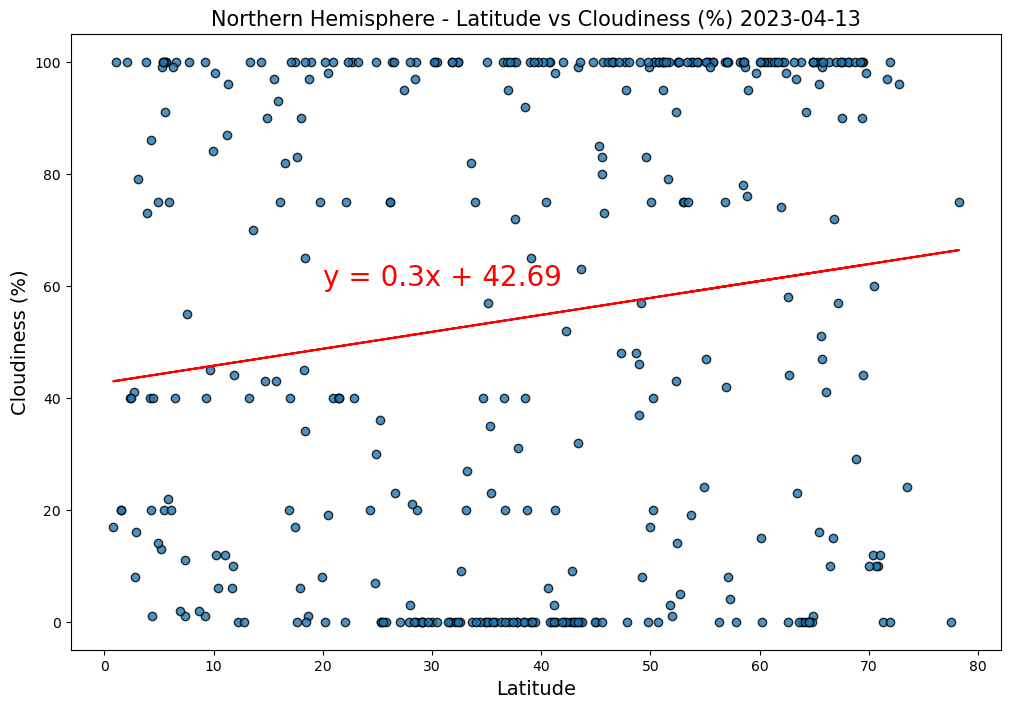

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.035540140522171804
The correlation between both factors is 0.19


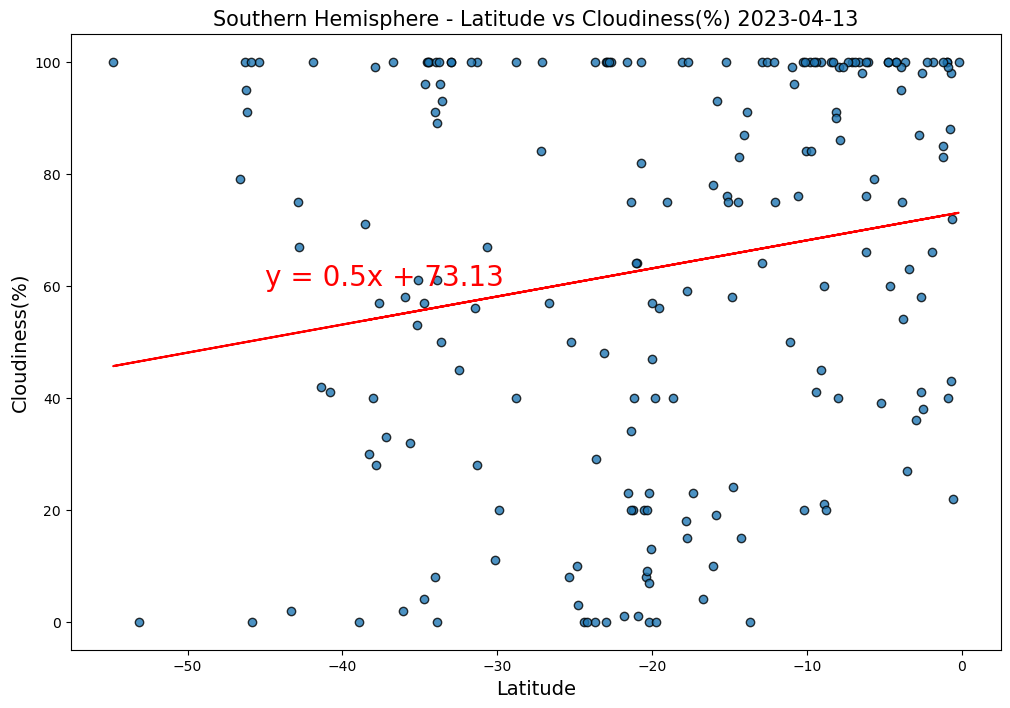

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness in northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.02448084152836504
The correlation between both factors is 0.16


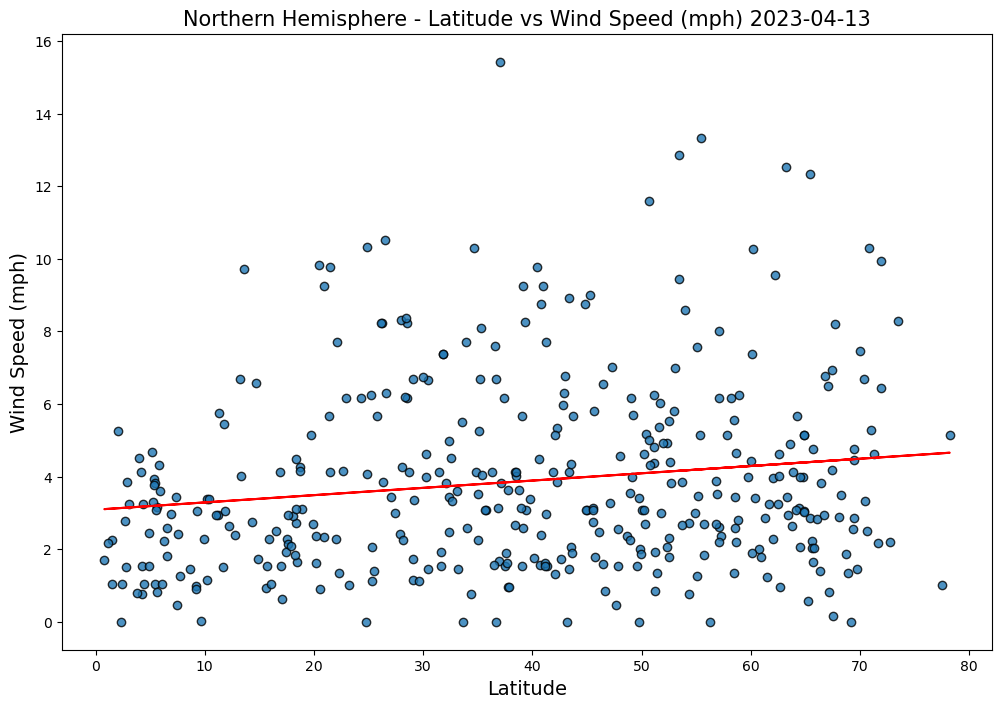

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.13404502827652082
The correlation between both factors is -0.37


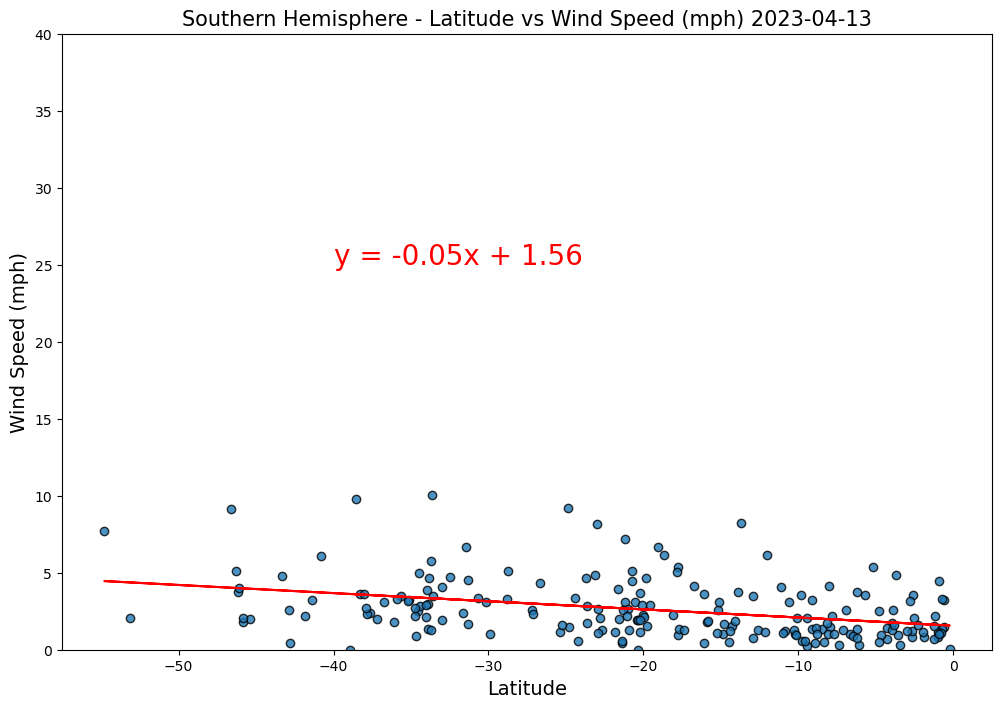

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between wind speed and latitude in southern hemisphere. But for northern hemisphere, there's no strong correlation, just evenly scattered values over the latitudes.